#Group 10

##Juan Gonzalez
##Yashwee Kothari
##Ranfis Francisco

<h4>In this project we will be attempting to forecast the price BTC using a Recurrent Neural Network (RNN), Long Short-Term Memory(LSTM), and Autoregression (AR). 
We will be using price data from yahoo finance along with Twitter "crypto influencer" tweet sentiment scores to try and predict the price of BTC at some point in the future. (please run this project cell by cell. Do not use "run all")

<h1>Twitter Sentiment Forecast</h1>
<div><p>
We will be attempting to forecast the price of BTC using a Recurrent Neural Network (RNN) with  Long Short-Term Memory(LSTM), and Autoregression (AR). Our prediction requires that we import price data for BTC. We begin by installing and importing the necessary libraries required to intake and process the data into a format that is usable by our prediction model. To accomplish this, we have chosen the yahoofinancials library available for python. 
To store, shape and visualize the data, we will use the Pandas library to create dataframes. We will also use the numpy library to perform the more complex scientific calculations. Along with the price data we will need to scrape twitter feed data. To accomplish this, we will use the Twitter Intelligence library (Twint). Once the data has been properly stored and formatted, we will use the flair library for natural language processing (NLP) to process tweets in order to gain insight as to each tweets sentiment and assign it a positive or negative value. 
Once the data has been examined, cleaned, and transformed, we will create a new dataframe relating the percentage of positive sentiment to the price of the asset on any given day in a predetermined range. The “dataframe_to_window” function is used to transform the data and return dataframes where every row is the data of the <window> preceding rows. The data is now ready to be used in training our model.
From the sklearn library we use “train_test_split” to split our data into a 70/30 train test pair that will be used to train our model with price and sentiment data from the past and then test its ability to predict prices in the future. 
</p></div>


<h1>DeepAR</h1>

DeepAR is a supervised learning algorithm for time series forecasting that uses recurrent neural networks (RNN) to produce both point and probabilistic forecasts.<br>
The amazon sagemaker DeepAR prediction model that was suggested proved to be riddled with technical difficulties due to failing dependencies. We also encountered charges of 15 - 20 dollars per account due to our lack of familiarity with the Amazon AWS environment. These issues were handled but, we would not find success with the Amazon AWS environment and thus pivoted to a simpler LSTM-based recurrent neural network architecture for probabilistic forecasting. <br>
The tensorflow library and keras for deep learning are used to model our RNN with LSTM using the “Adam” algorithm for optimization. (Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments). We have chosen to measure regression losses by computing the mean of squares of errors between labels and predictions. We have set the “epochs” to 30 to avoid overfitting (an epoch is a single iteration through the data). Using “tf.keras.utils.plot_model” we plot the model and show the shape. 


<h1>Prophet Predictor</h1>

The prophet model is a time series forecasting model which is designed to handle the common features but also has the ability to include intuitive parameters that can be adjusted without knowing the underlying details of the model. The Prophet model is suited to work for forecasting tasks that have hourly, daily, or weekly observations that have at least a few months of historical data, data about the impact of important events and holidays is known, and data regarding trend changes, and trends that are non-linear. Prophet allows analysts to inject their own prior information about the forecast prediction, for growth curves it allows users to manually specify the capacities or the upper most limit for the curve.


The Prophet predictor is an additive regression model. An additive regression model is non-parametric with non-linear smoothers applied to the regressor. In the prophet model only time is used as a regressor but several linear and nonlinear functions are used as components. This model uses 3 main components: trend, seasonality, and holidays. The following equation is used to model this time series:
    
$$    y(t) = g(t) +s(t) + h(t) + et $$

In this equation g(t) is the trend function which models non-periodic changes in the value of the times series. s(t) represents periodic changes (weekly, yearly, etc) and h(t) represents the effects of holidays which occur on irregularly scheduled days such as thanksgiving, black friday, etc. The error term at the end of the equation is for any changes which are not accommodated by the model. The Prophet model makes the assumption that this error term is normally distributed. 
The trend model in the equation is split into 2: a saturating growth and a piecewise linear model. The growth model of the Prophet model is similar to population growth so it is modeled as the logistic growth model 

$$    g(t) =C/ (1 + exp(k(t-m)))  $$

where C is the capacity, k growth rate, and m an offset. The Prophet model detects the changes in the trends by selecting different changepoints from the data. 


Seasonality component of the equation y(t) is modeled using the Fourier series which provides a flexible model of periodic effects. Seasonality is a result of human behavior such as the length of work weeks, vacation schedules, and breaks.  These effects repeat yearly. Holidays and events on the other hand do not follow a periodic pattern and their effects are hard to predict using a smooth cycle. It becomes harder for the model since sometimes days like Thanksgiving and Super Bowl occur during different months or days of the week. This makes it difficult to programmatically train the model to predict changes on those days. So instead Prophet allows the analyst to provide their own custom list of past and future events. The effects of these lists of events and holidays are assumed to be independent of each other. Additionally, the model includes additional parameters to capture the effects for a window of days around the holidays and events. This treats each of the days in the window as the holiday as well. 

The prophet model is a flexible regression model compared to a traditional time series model because it allows including model seasonality, trend fitting, and including holidays and events. 



<h2>Install/Import Libraries


In [ ]:
%%capture
!pip install yahoofinancials

<h3> We will use pandas for dataframes and numpy for scientific computations

In [ ]:
import pandas as pd
import numpy as np

<h3>We will use Twitter Intelligence Tool (twint) rather than the Twitter API to scrape tweet and flair for natural language proccessing (NLP)


In [ ]:
%%capture
!pip install twint
!pip install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip install flair
!pip install nest_asyncio

In [ ]:
# get python libraries needed to access/import tweets 
import twint
import json
from datetime import date
from datetime import datetime
import time
import requests

#import pandas as pd
import nest_asyncio

<h3>Build a dataframe of influencers tweets data

In [ ]:
# Configure
#import pandas as pd

#dataframe of influencers whos tweets we will scrape
users = ['APompliano', 'ErikVorhees','TyDanielSmith', 'ToneVays','Bitboy_Crypto','LayahHeilpern','coinboundio','IvanOnTech','ScottMellker','KennethBosak', 'CryptoCobain', 'Tyler', 'VitalikButerin','CryptoWendyO','StackingUSD', 'TheCryptoDog','DanHeld','CryptoBrekkie','PeterMcCormack']

df = pd.DataFrame()


<h3>Scrape BTC tweets into a dataframe by influencer by date

In [ ]:
# This cell does not play nice with the "Run All" command. Try running each cell one by one.
%%capture
import nest_asyncio

nest_asyncio.apply()

# Here, we get tweets with the word "bitcoin" by the users we have selected
for i in users:
    c = twint.Config()
    c.Hide_output = True
    c.Username = i
    c.Limit = 5000
    c.Search = ["bitcoin"]
    #c.Popular_tweets = True
    c.Pandas = True
    # Run
    twint.run.Search(c)
    Tweets_df = twint.storage.panda.Tweets_df
    df = pd.concat([df,Tweets_df],ignore_index=True)
    #print(df)

<h3>Let's look at the dataframe

In [ ]:
df.head() 

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1467892706408030214,1467892706408030214,1.638808e+12,2021-12-06 16:24:27,+0000,,We're LIVE with @maxkeiser and @stacyherbert r...,en,[],[],339061487,339061487,APompliano,Pomp 🌪,1,16,https://twitter.com/APompliano/status/14678927...,[http://www.youtube.com/c/anthonypompliano/live],[https://pbs.twimg.com/media/FF8AoxQWQAcd2oF.jpg],1,https://pbs.twimg.com/media/FF8AoxQWQAcd2oF.jpg,False,189,62,31,,['bitcoin'],,,,,,,[],,,,
1,1467886503997198343,1467886503997198343,1.638806e+12,2021-12-06 15:59:49,+0000,,Today's episode of The Best Business Show is 🔥...,en,[],[],339061487,339061487,APompliano,Pomp 🌪,1,15,https://twitter.com/APompliano/status/14678865...,[http://www.youtube.com/c/anthonypompliano/live],[],0,,False,146,31,15,,['bitcoin'],,,,,,,[],,,,
2,1467870845653684237,1467867606304571392,1.638803e+12,2021-12-06 14:57:35,+0000,,@PeterSchiff Gold is down 4% over the last yea...,en,[],[],339061487,339061487,APompliano,Pomp 🌪,1,14,https://twitter.com/APompliano/status/14678708...,[],[],0,,False,1194,55,41,,['bitcoin'],,,,,,,"[{'screen_name': 'PeterSchiff', 'name': 'Peter...",,,,
3,1467870353204600835,1467870353204600835,1.638803e+12,2021-12-06 14:55:38,+0000,,This is an interesting exploration of bitcoin ...,en,[],[],339061487,339061487,APompliano,Pomp 🌪,1,14,https://twitter.com/APompliano/status/14678703...,[https://thebitcoinlayer.substack.com/p/bitcoi...,[],0,,False,281,37,44,,['bitcoin'],,,,,,,[],,,,
4,1467843497751363590,1467843497751363590,1.638796e+12,2021-12-06 13:08:55,+0000,,New episode with @Russ_N_Starr is now live! -...,en,[],[],339061487,339061487,APompliano,Pomp 🌪,1,13,https://twitter.com/APompliano/status/14678434...,[https://podcasts.apple.com/us/podcast/742-bri...,[],0,,False,126,30,15,,['bitcoin'],,,,,,,[],,,,


In [ ]:
df['tweet'].shape

(688,)

<h3>Use the flair library to determine tweet sentiment and add it to our dataframe

In [ ]:
import flair
senti = flair.models.TextClassifier.load('en-sentiment')

senti_array = []

  #run sentiment anayalsis here

for sentence in df['tweet'].values:
  s = flair.data.Sentence(sentence)
  senti.predict(s)
  
  senti_array.append(s.labels[0].value)

df['sentiment'] = senti_array

df_new = df[['date', 'tweet', 'sentiment']]
df_new['date'].sort_values(ascending=True)


2021-12-06 15:43:49,635 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpd6riivpx


100%|██████████| 265512723/265512723 [00:31<00:00, 8423023.78B/s] 

2021-12-06 15:44:21,654 copying /tmp/tmpd6riivpx to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2021-12-06 15:44:22,150 removing temp file /tmp/tmpd6riivpx
2021-12-06 15:44:22,187 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

558    2020-11-15 12:56:03
557    2020-11-18 11:14:18
556    2020-11-18 11:42:17
555    2020-11-19 05:06:29
554    2020-11-19 05:50:11
              ...         
337    2021-12-06 15:00:04
315    2021-12-06 15:01:17
336    2021-12-06 15:07:04
335    2021-12-06 15:14:05
671    2021-12-06 15:21:33
Name: date, Length: 751, dtype: object

In [ ]:
df_new['date'] = pd.to_datetime(df_new['date'], format='%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<h3> The new dataframe has only the date, tweet, and the sentiment associated with it

In [ ]:
df_new.head()

,date,tweet,sentiment
0,2021-12-06 14:57:35,@PeterSchiff Gold is down 4% over the last yea...,NEGATIVE
1,2021-12-06 14:55:38,This is an interesting exploration of bitcoin ...,POSITIVE
2,2021-12-06 13:08:55,New episode with @Russ_N_Starr is now live! -...,POSITIVE
3,2021-12-06 01:40:06,FUN FACT: The employment company that @CJSakam...,POSITIVE
4,2021-12-05 23:17:43,@naomibrockwell @matthew_d_green You can use b...,POSITIVE


<h3> Arrange, clean and prepare data

In [ ]:

day = [i for i in range(1, 30)]
df_sentimentAnalysis = pd.DataFrame()
p = []
date = []
for k in [8,9,10]:
  for i in day:
    j=i+1
    filtered_df = df_new.loc[(df_new['date'] >= '2021-'+str(k)+'-'+str(i))
                      & (df_new['date'] < '2021-'+str(k)+'-'+str(j))]
    
    if not filtered_df.empty:
      x = filtered_df['sentiment'].value_counts()
      
      #percent of positive
      if len(x) >1:
        p.append((x[1])/sum(x))
        date.append('2021-'+str(k)+'-'+str(j))
      else:
        p.append(0)
        date.append('2021-'+str(k)+'-'+str(j))
    else:
        p.append(0)
        date.append('2021-'+str(k)+'-'+str(j))        

df_sentimentAnalysis['formatted_date'] = date
df_sentimentAnalysis['percentPos'] = p


df_sentimentAnalysis['formatted_date'] = pd.to_datetime(df_sentimentAnalysis['formatted_date'])
df_sentimentAnalysis['formatted_date']= df_sentimentAnalysis['formatted_date'].dt.strftime('%Y-%m-%d')
df_sentimentAnalysis = df_sentimentAnalysis.set_index('formatted_date')
df_sentimentAnalysis

,percentPos
formatted_date,
2021-08-02,0.000000
2021-08-03,0.000000
2021-08-04,0.000000
2021-08-05,0.000000
2021-08-06,0.000000
...,...
2021-10-26,0.142857
2021-10-27,0.500000
2021-10-28,0.200000


<h3>Get price data from YahooFinancials

In [ ]:
from yahoofinancials import YahooFinancials

def get_df(start_date, end_date):
  yahoo_financials = YahooFinancials('BTC-USD')
  data=yahoo_financials.get_historical_price_data(start_date, end_date, "daily")
  btc_df = pd.DataFrame(data['BTC-USD']['prices'])
  btc_df = btc_df.drop('date', axis=1).set_index('formatted_date')
  # drop all data except closing price
  btc_df = btc_df.drop(['high', 'low', 'open', 'volume', 'adjclose'], axis=1)
  btc_df = btc_df.dropna(axis=0)
  return btc_df

# collection_start_date, collection_end_date = ("2015-01-01", "2020-01-30")
collection_start_date, collection_end_date = ("2020-01-01", "2021-11-30")
btc_df = get_df(collection_start_date, collection_end_date)
btc_df.tail()

,close
formatted_date,
2021-11-26,53569.765625
2021-11-27,54815.078125
2021-11-28,57248.457031
2021-11-29,57806.566406
2021-11-30,57005.425781


<h3>Create dataframe with sentiment percentages and price data  

In [ ]:
btc_final= pd.merge(btc_df, df_sentimentAnalysis, on='formatted_date', how='outer')
btc_final['percentPos'] = btc_final['percentPos'].fillna(0) # Replace NaN with 0
btc_final = btc_final.dropna(axis = 0) # Drop any remaining NaN's just in case
print(btc_final.shape)
print(btc_final.tail)

(696, 2)
<bound method NDFrame.tail of                        close  percentPos
formatted_date                          
2020-01-01       7200.174316         0.0
2020-01-02       6985.470215         0.0
2020-01-03       7344.884277         0.0
2020-01-04       7410.656738         0.0
2020-01-05       7411.317383         0.0
...                      ...         ...
2021-11-26      53569.765625         0.0
2021-11-27      54815.078125         0.0
2021-11-28      57248.457031         0.0
2021-11-29      57806.566406         0.0
2021-11-30      57005.425781         0.0

[696 rows x 2 columns]>


<h3>Lets take a look at BTC price chart

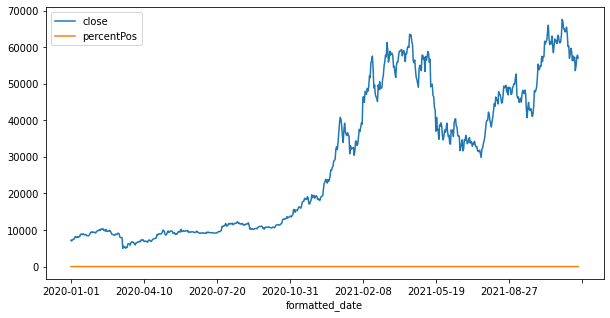

In [ ]:
import matplotlib.pyplot as plt

btc_final.plot(subplots=False, figsize=(10, 5))
plt.show()

<h3>Transform data from dataframe (LSTM)




In [ ]:
def dataframe_to_window(df, window, normalization_factor=1, include_sentiment=False):
  # Take dataframe and return dataframe where every row is the data of the <window> preceding rows.
  window_cols = {}

  for i in range(1, window + 1):
    window_cols["day -" + str(i)] = []
  window_cols["close"] = []
  if include_sentiment:
    window_cols["percentPos"] = []

  num_of_days = df.shape[0]

  for i in range(window, num_of_days, 1):
    for j in range(1, window + 1):
      window_cols["day -" + str(j)].append(df.iloc[i - j]['close'] / normalization_factor)
    window_cols["close"].append(df.iloc[i]['close'] / normalization_factor)
    if include_sentiment:
      window_cols["percentPos"].append(df.iloc[i]['percentPos'])

  window_df = pd.DataFrame(window_cols)
  return window_df

<h4>We create 1 dataframe for without any sentiment data and 1 with.</h4>

In [ ]:
window_size = 5
normalization_factor = 100000

window_data = dataframe_to_window(btc_final, window_size, normalization_factor)
window_data_with_sentiment = dataframe_to_window(btc_final, window_size, normalization_factor, include_sentiment=True)

nov_window_data = window_data.iloc[-31:]
window_data = window_data.iloc[:-31]

nov_window_data_s = window_data_with_sentiment.iloc[-31:]
window_data_with_sentiment = window_data_with_sentiment.iloc[:-31]

print(window_data)

       day -1    day -2    day -3    day -4    day -5     close
0    0.074113  0.074107  0.073449  0.069855  0.072002  0.077692
1    0.077692  0.074113  0.074107  0.073449  0.069855  0.081637
2    0.081637  0.077692  0.074113  0.074107  0.073449  0.080799
3    0.080799  0.081637  0.077692  0.074113  0.074107  0.078791
4    0.078791  0.080799  0.081637  0.077692  0.074113  0.081666
..        ...       ...       ...       ...       ...       ...
655  0.630398  0.609308  0.613936  0.606923  0.622102  0.603638
656  0.603638  0.630398  0.609308  0.613936  0.606923  0.584824
657  0.584824  0.603638  0.630398  0.609308  0.613936  0.606221
658  0.606221  0.584824  0.603638  0.630398  0.609308  0.622280
659  0.622280  0.606221  0.584824  0.603638  0.630398  0.618888

[660 rows x 6 columns]


<h3> Prepare data for training

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

def get_train_test_split(data):
  x_train, x_test, y_train, y_test = train_test_split(data.drop(['close'], axis=1), data[['close']], test_size=0.3, shuffle=False, random_state=42)

  print("Number of training samples: ", len(x_train))
  print("Number of testing sample: ", len(x_test))

  # Reshape since model expects 3D input
  x_test = x_test.to_numpy()
  x_test = x_test[..., np.newaxis].astype(np.float32)
  x_train = x_train.to_numpy()
  x_train = x_train[..., np.newaxis].astype(np.float32)
  print('x_test shape', x_test.shape)
  print('y_test shape', y_test.shape)

  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = get_train_test_split(window_data)

x_train_s, x_test_s, y_train_s, y_test_s = get_train_test_split(window_data_with_sentiment)

Number of training samples:  462
Number of testing sample:  198
x_test shape (198, 5, 1)
y_test shape (198, 1)
Number of training samples:  462
Number of testing sample:  198
x_test shape (198, 6, 1)
y_test shape (198, 1)


<h3>Train model using Tensorflow keras

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

<h4>Here we make a model using LSTM's and Dropouts alternated several times.

Droputs reduce overfitting and will improve performance by temporaroly removing random nodes, preventing overfitting where there is a lot of data.</h4>

In [ ]:
# model = keras.models.Sequential([
#     keras.layers.SimpleRNN(20, return_sequences=True),
#     keras.layers.SimpleRNN(10, return_sequences=True),
#     keras.layers.SimpleRNN(1)
# ])

model = keras.models.Sequential([
    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.Dropout(0.2),
    #keras.layers.Dense(units=1),
    keras.layers.SimpleRNN(1)
])

model_s = keras.models.clone_model(model)

model.compile(loss="mse", optimizer="adam")
model_s.compile(loss="mse", optimizer="adam")

In [ ]:
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_test, y_test))

Epoch 1/30
15/15 [==============================] - 10s 135ms/step - loss: 0.0428 - val_loss: 0.0589
Epoch 2/30
15/15 [==============================] - 0s 18ms/step - loss: 0.0229 - val_loss: 0.0401
Epoch 3/30
15/15 [==============================] - 0s 19ms/step - loss: 0.0080 - val_loss: 0.0028
Epoch 4/30
15/15 [==============================] - 0s 22ms/step - loss: 0.0027 - val_loss: 5.3045e-04
Epoch 5/30
15/15 [==============================] - 0s 21ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 6/30
15/15 [==============================] - 0s 20ms/step - loss: 0.0015 - val_loss: 5.4988e-04
Epoch 7/30
15/15 [==============================] - 0s 21ms/step - loss: 0.0018 - val_loss: 8.7457e-04
Epoch 8/30
15/15 [==============================] - 0s 21ms/step - loss: 0.0015 - val_loss: 7.3340e-04
Epoch 9/30
15/15 [==============================] - 0s 21ms/step - loss: 0.0014 - val_loss: 6.0079e-04
Epoch 10/30
15/15 [==============================] - 0s 21ms/step - loss: 0.0018 - val_

In [ ]:
history_s = model_s.fit(x_train_s, y_train_s, epochs=30,
                    validation_data=(x_test_s, y_test_s))

Epoch 1/30
15/15 [==============================] - 11s 137ms/step - loss: 0.0465 - val_loss: 0.0510
Epoch 2/30
15/15 [==============================] - 0s 20ms/step - loss: 0.0195 - val_loss: 0.0384
Epoch 3/30
15/15 [==============================] - 0s 19ms/step - loss: 0.0070 - val_loss: 8.1040e-04
Epoch 4/30
15/15 [==============================] - 0s 20ms/step - loss: 0.0031 - val_loss: 7.2944e-04
Epoch 5/30
15/15 [==============================] - 0s 20ms/step - loss: 0.0023 - val_loss: 5.3942e-04
Epoch 6/30
15/15 [==============================] - 0s 20ms/step - loss: 0.0023 - val_loss: 6.5930e-04
Epoch 7/30
15/15 [==============================] - 0s 21ms/step - loss: 0.0015 - val_loss: 7.5277e-04
Epoch 8/30
15/15 [==============================] - 0s 20ms/step - loss: 0.0021 - val_loss: 6.9238e-04
Epoch 9/30
15/15 [==============================] - 0s 20ms/step - loss: 0.0019 - val_loss: 7.6708e-04
Epoch 10/30
15/15 [==============================] - 0s 23ms/step - loss: 0.001

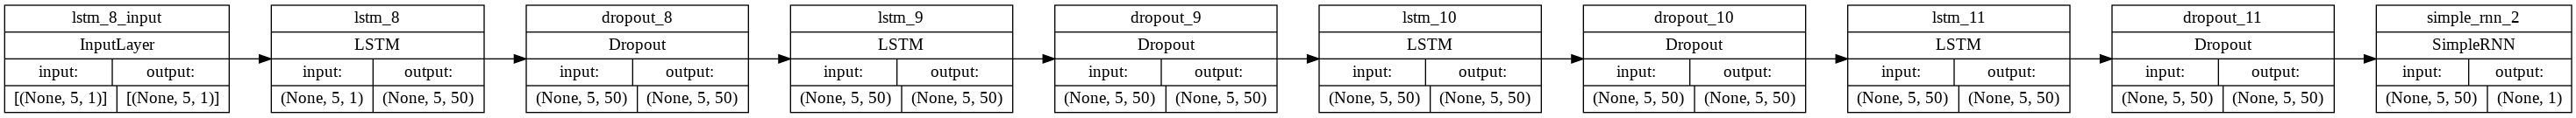

In [ ]:
tf.keras.utils.plot_model(model, rankdir='LR', show_shapes=True)

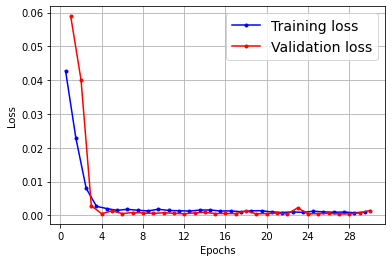

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    # plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
print(model.evaluate(x_test, y_test))
print(y_test.iloc[0: window_size+1])
print(model.predict(x_test[0:1]))

7/7 [==============================] - 0s 4ms/step - loss: 0.0015
0.001465482055209577
        close
462  0.615728
463  0.606838
464  0.562162
465  0.557243
466  0.564730
467  0.539061
[[0.6426655]]


<h4>Here, the model makes a predicition on data it has not seen before for the month of November.</h4>

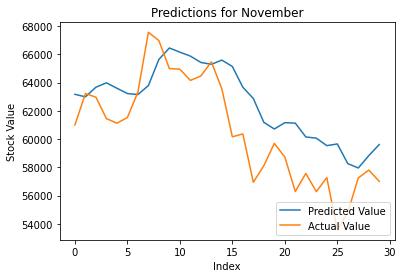

In [ ]:
x = nov_window_data.drop(['close'], axis=1).iloc[-30:]
y = nov_window_data[['close']].iloc[-30:]
y_pred = model.predict(x)

plt.plot(y_pred*normalization_factor, label="Predicted Value")
plt.plot(y.to_numpy()*normalization_factor, label="Actual Value")
plt.legend(loc='lower right')
plt.xlabel("Index")
plt.ylabel("Stock Value")
plt.title("Predictions for November without Sentiment")
plt.show()

<h4>For the sentiment analysis, we do not believe there is enough data for the sentiment to make any impact on the analysis. The data given by this model appears to be the same as withouth the sentiment but shifted down.</h4>

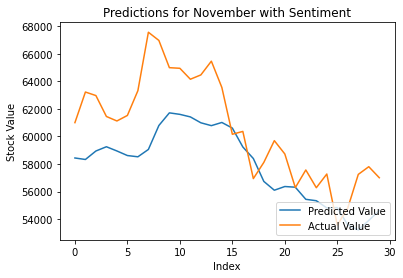

In [ ]:
x = nov_window_data_s.drop(['close'], axis=1).iloc[-30:]
y = nov_window_data_s[['close']].iloc[-30:]
y_pred = model_s.predict(x)

plt.plot(y_pred*normalization_factor, label="Predicted Value")
plt.plot(y.to_numpy()*normalization_factor, label="Actual Value")
plt.legend(loc='lower right')
plt.xlabel("Index")
plt.ylabel("Stock Value")
plt.title("Predictions for November with Sentiment")
plt.show()

#Train Prophet Model

<h4>Prophet is an open source tool for forecasting time series data. It is capable of taking into account holidays when making predictions based on input data.</h4>

In [ ]:
%%capture
!pip install pystan
!pip install Prophet

In [ ]:
import warnings; # helps minimize lengthy red warnings
warnings.simplefilter('ignore')

In [ ]:
#import pandas as pd
from prophet import Prophet

<h3> Prepare our dataframe for time series

In [ ]:
# Add new columns with correct names to match Prophet API requirements.
prophet_df = pd.DataFrame()
prophet_df["y"] = btc_final.iloc[:-30]["close"]
prophet_df["ds"] = btc_final[:-30].index
prophet_df

,y,ds
formatted_date,,
2020-01-01,7200.174316,2020-01-01
2020-01-02,6985.470215,2020-01-02
2020-01-03,7344.884277,2020-01-03
2020-01-04,7410.656738,2020-01-04
2020-01-05,7411.317383,2020-01-05
...,...,...
2021-10-27,58482.386719,2021-10-27
2021-10-28,60622.136719,2021-10-28
2021-10-29,62227.964844,2021-10-29


<h4>Check that our data types are correct.</h4>

In [ ]:
prophet_df.dtypes

y            float64
ds    datetime64[ns]
dtype: object

In [ ]:
prophet_df['ds'] = pd.to_datetime(prophet_df['ds']) #ds must be datetime type for prophet
prophet_df.dtypes

In [ ]:
m = Prophet()
model = m.fit(prophet_df)

In [ ]:
future = m.make_future_dataframe(periods=30, freq='D')
future.tail()

,ds
691,2021-11-26
692,2021-11-27
693,2021-11-28
694,2021-11-29
695,2021-11-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
691,2021-11-26,62647.083051,58335.043818,66843.467744
692,2021-11-27,62795.012431,58659.897917,67298.617320
693,2021-11-28,62888.934855,58755.357563,67245.409068
694,2021-11-29,63036.441425,58586.238782,67529.558672
695,2021-11-30,63114.183572,58711.179860,67545.706485


<h4>Forecast Prediction</h4>


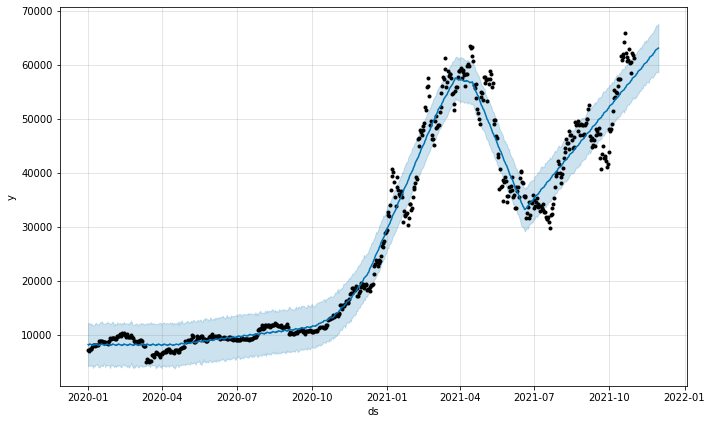

In [ ]:
fig1 = m.plot(forecast)

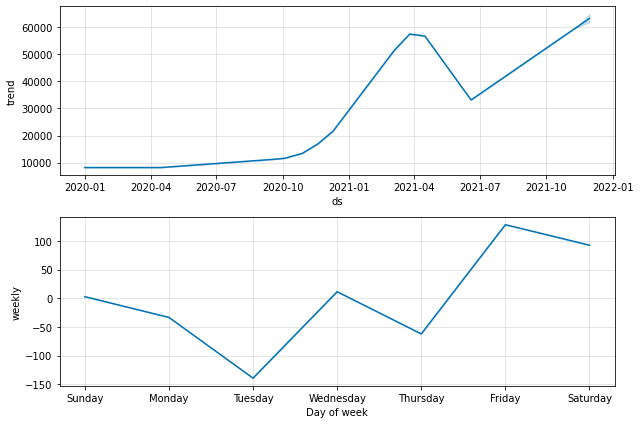

In [ ]:
fig2 = m.plot_components(forecast)

<h4>X axis for the predictied value is likely miscaled in the below graph.</h4>

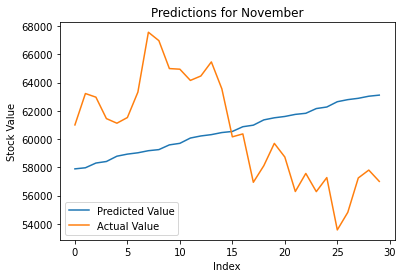

In [ ]:
plt.plot(forecast.iloc[-30:].reset_index()['yhat'], label="Predicted Value")
plt.plot(nov_window_data[['close']].iloc[-30:].to_numpy() * normalization_factor, label="Actual Value")
plt.xlabel("Index")
plt.ylabel("Stock Value")
plt.title("Predictions for November")
plt.legend(loc='lower left')
plt.show()